# Tokyo Olympic 2021

In [5]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Details

This contains the details of over  743 Teams, 11,000 athletes and 47 disciplines taking part in the Tokyo Olympics 2021.

This dataset contains the details of the Athletes, Coaches, Teams participating as well as the Entries by gender.

It contains their names, countries represented, discipline, gender of competitors, name of the coaches.

In [9]:
# importing Dataset

athletes = pd.read_excel("C:\\Users\\Dell\\Downloads\\TOKYO OLY\\Athletes.xlsx")
coaches = pd.read_excel("C:\\Users\\Dell\\Downloads\\TOKYO OLY\\Coaches.xlsx")
gender = pd.read_excel("C:\\Users\\Dell\\Downloads\\TOKYO OLY\\EntriesGender.xlsx")
medals = pd.read_excel("C:\\Users\\Dell\\Downloads\\TOKYO OLY\\Medals.xlsx")
teams = pd.read_excel("C:\\Users\\Dell\\Downloads\\TOKYO OLY\\Teams.xlsx")

# 1. GENDER EDA

1. Maximum number of Male participants is 1072.
2. Maximum number of Female participants is 969.
3. Swimming, Rhythmic Gymnastics and Artistic has no Male participants.

In [10]:
gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [11]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Discipline  46 non-null     object
 1   Female      46 non-null     int64 
 2   Male        46 non-null     int64 
 3   Total       46 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.6+ KB


In [13]:
gender.shape

(46, 4)

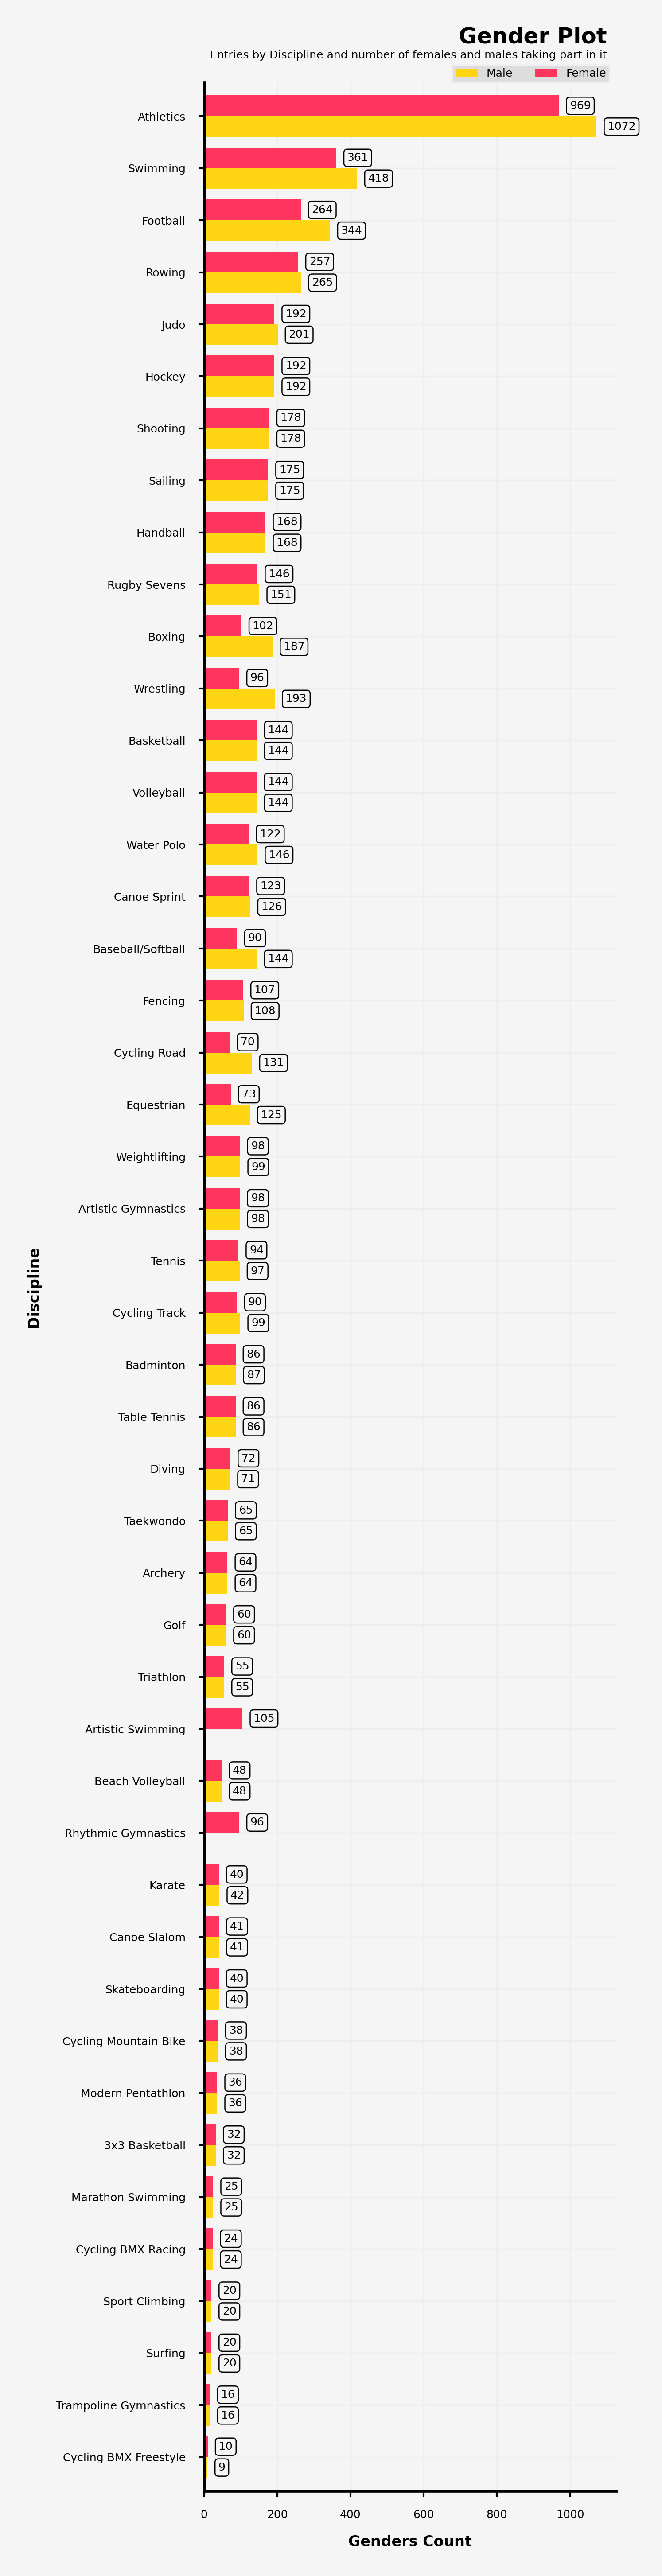

In [16]:
gender.sort_values(by='Total',inplace=True)

# Gender barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514','#ff355d'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = gender.plot(x='Discipline',y=['Male','Female'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Genders Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Male', 'Female'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.01), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            if value == '0':
                pass
            else:
                x = p.get_x() + p.get_width() + 30
                y = p.get_y() + p.get_height() / 2 
                ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                        bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))


ax0_sns.text(1100,46.4, f'Gender Plot', fontsize=6, weight='bold',ha='right')
ax0.text(1100, 46.11,f'Entries by Discipline and number of females and males taking part in it',fontsize=3,ha='right')

plt.show()

# 2. ATHLETES EDA

1. United States of America and host Japan has maximum number of representation in olympic 2021.
2. 117 Athletes are represted India.
3. South Sudan, along with 15 more countries where only 2 Athletes participated.

In [17]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [18]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [19]:
athletes.shape

(11085, 3)

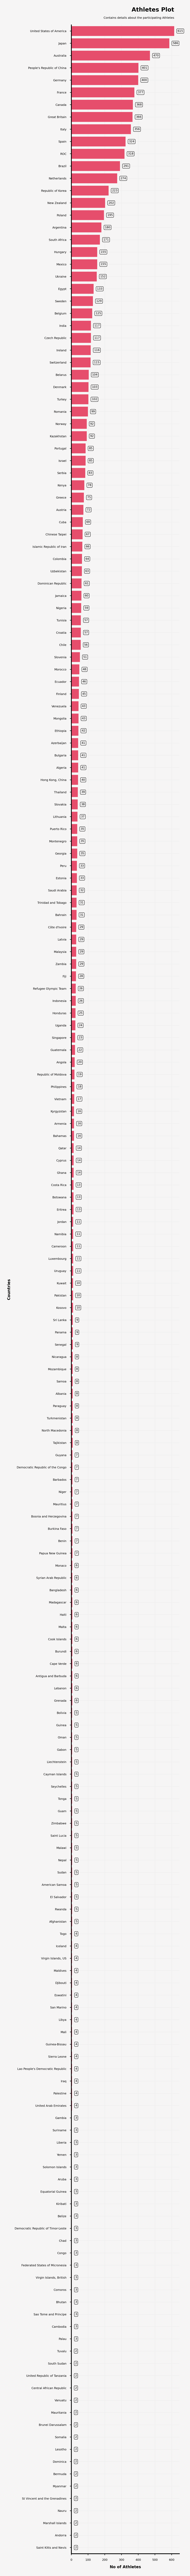

In [21]:
y = athletes.NOC.value_counts().index
x = athletes.NOC.value_counts().values

# Athletes barplot with Discipline
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,48), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=athletes,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Athletes',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Countries',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(ncol=4, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.005), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 20
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Athletes Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')




ax0_sns.text(615,-1.6, f'Athletes Plot', fontsize=6, weight='bold',ha='right')
ax0.text(615,-1,f'Contains details about the participating Athletes',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()


# 3. TEAMS EDA

1. Swimming which is the maximum number of country participants.
2. Baseball and Softball has minimum number of country participants.

In [22]:
teams.head()

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women


In [23]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        743 non-null    object
 1   Discipline  743 non-null    object
 2   NOC         743 non-null    object
 3   Event       743 non-null    object
dtypes: object(4)
memory usage: 23.3+ KB


In [24]:
teams.shape

(743, 4)

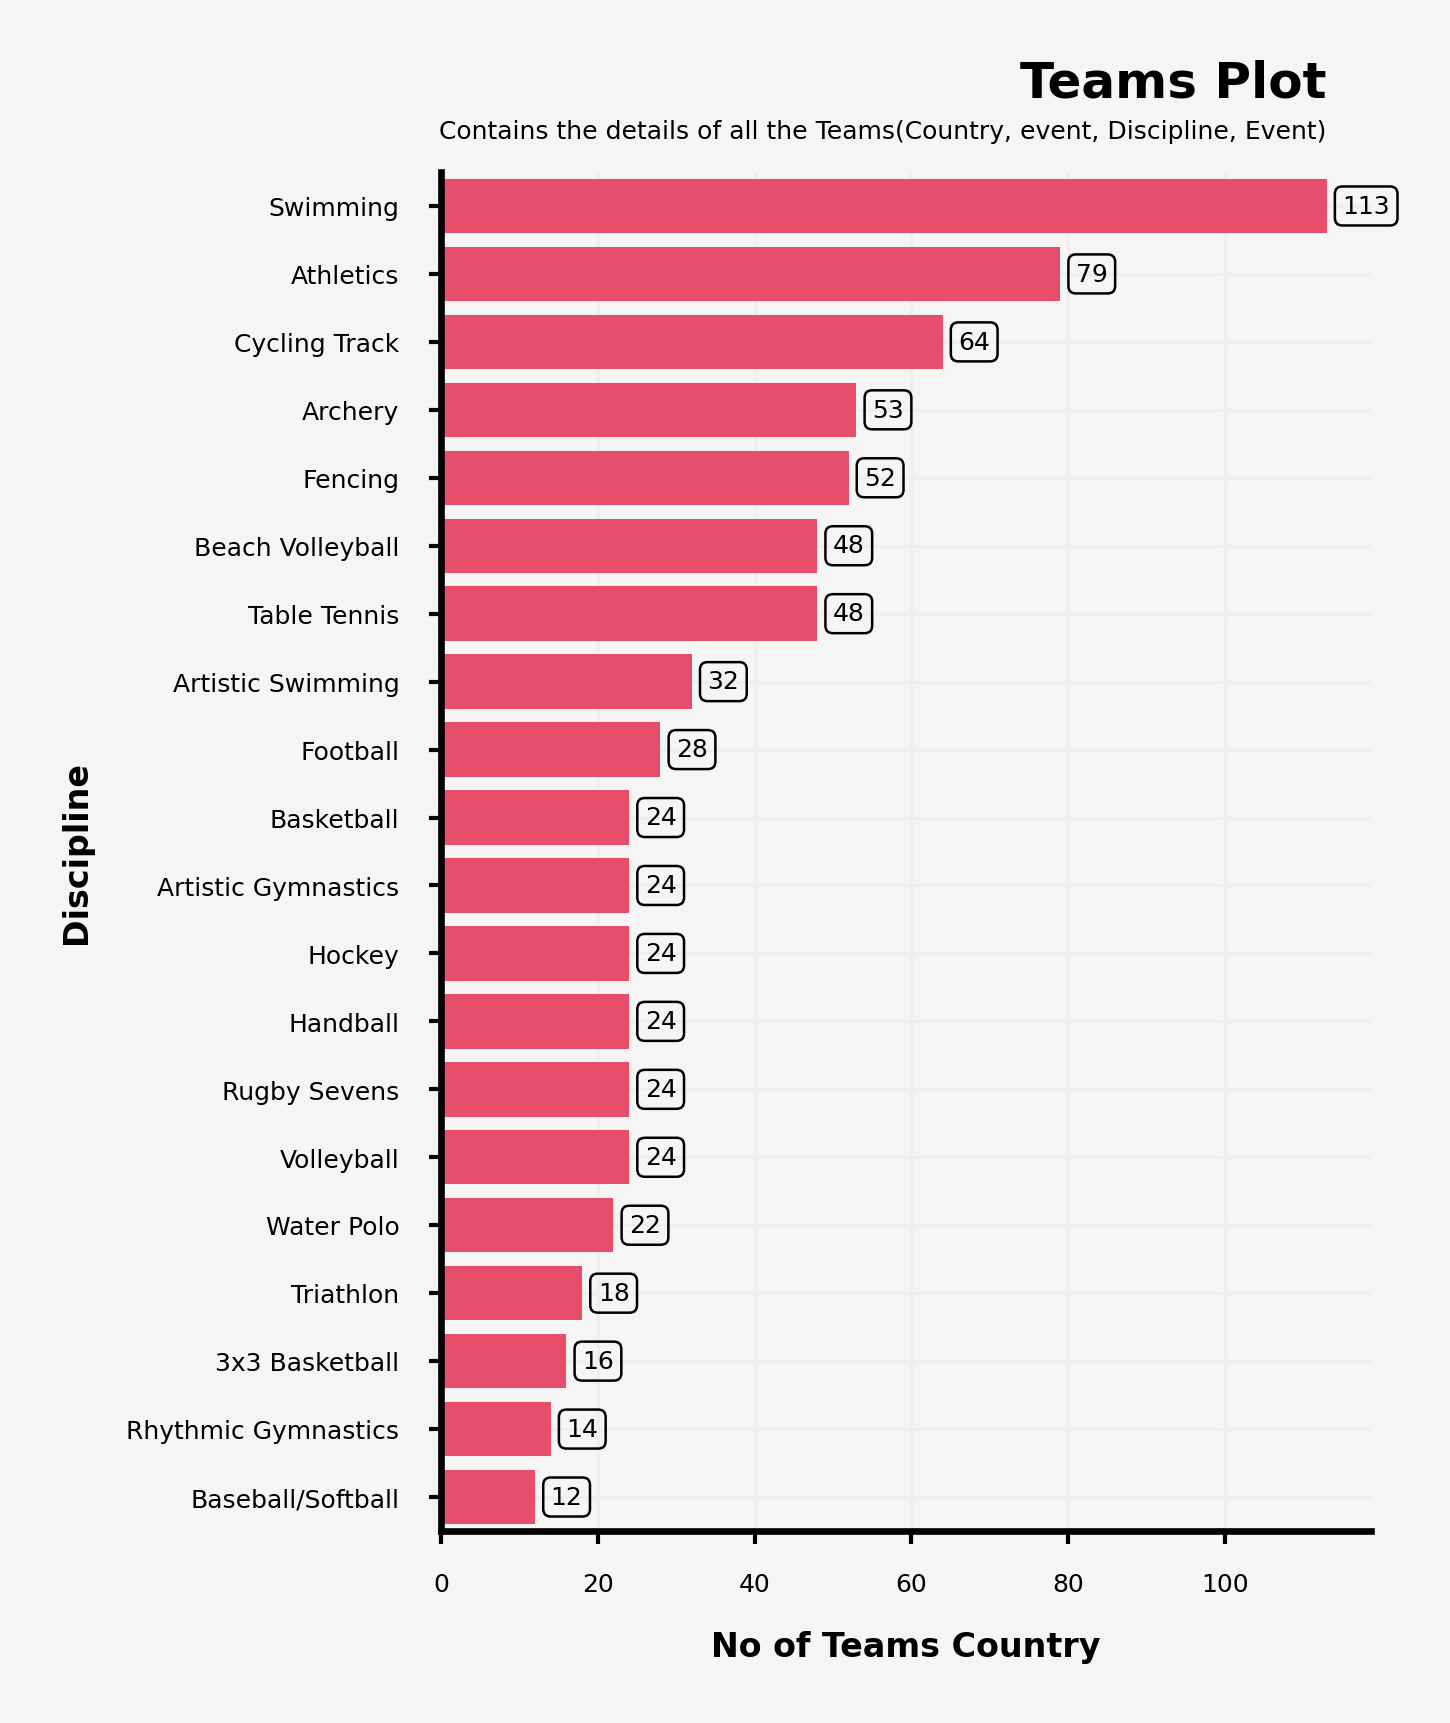

In [26]:
y = teams.Discipline.value_counts().index
x = teams.Discipline.value_counts().values

# Teams barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,3), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#ff355d']*1200)
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = sns.barplot(data=teams,y=y,x=x,zorder=2)
ax0_sns.set_xlabel('No of Teams Country',fontsize=4, weight='bold')
ax0_sns.set_ylabel('Discipline',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

# ax0_sns.legend(['Country Count'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1.022, 1.035), loc='upper right')

for p in ax0_sns.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# plt.title(f'Teams Plot',fontdict=dict(fontsize=6,weight='bold',horizontalalignment= 'right'),loc='right')

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()


ax0_sns.text(113,-1.6, f'Teams Plot', fontsize=6, weight='bold',ha='right')
ax0.text(113,-1,f'Contains the details of all the Teams(Country, event, Discipline, Event)',fontsize=3,ha='right')
#ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

# 4. MEDALS EDA

1. United States of America has maximum number of Medals won in Tokyo Olympic 2021.
2. People's Republic of China won 38 Gold (2nd most after United States of America)
3. India won 1 Gold, 2 Silver, 4 Bronze

In [27]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3


In [28]:
medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           93 non-null     int64 
 1   Team/NOC       93 non-null     object
 2   Gold           93 non-null     int64 
 3   Silver         93 non-null     int64 
 4   Bronze         93 non-null     int64 
 5   Total          93 non-null     int64 
 6   Rank by Total  93 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ KB


In [29]:
medals.shape

(93, 7)

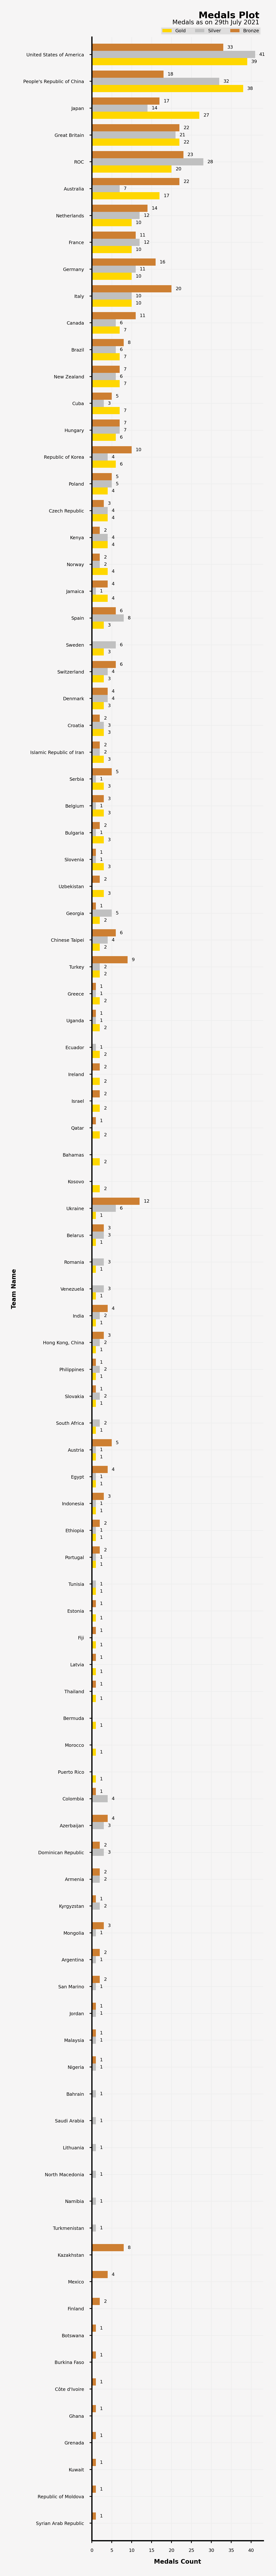

In [34]:
# Medals barplot
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(2,30), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700','#C0C0C0','#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])


for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)


ax0_sns = medals.plot(x='Team/NOC',y=['Gold','Silver','Bronze'],kind='barh',ax=ax0,zorder=2,width=0.8) ##plotttt
ax0_sns.set_xlabel('Medals Count',fontsize=4, weight='bold',)
ax0_sns.set_ylabel('Team Name',fontsize=4, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)


ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver','Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(1, 1.005), loc='upper right')

for p in ax0_sns.patches:
        value = f'{p.get_width():.0f}'
        if value == '0':
            pass
        else:
            x = p.get_x() + p.get_width() + 1
            y = p.get_y() + p.get_height() / 2
            ax0.text(x, y, value, ha='left', va='center', fontsize=3)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend-1, Yend+0.71, f'Medals Plot', fontsize=6, weight='bold',ha='right')
ax0.text(Xend-1, Yend+0.48,f'Medals as on 29th July 2021',fontsize=4,ha='right')

#ax0.get_xaxis().set_m8ajor_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
medals = medals.sort_index(ascending=False)

plt.show()